# <font color='#731448'>**MD004 - Naive Bayes y Analisis de Sentimientos**</font>

## <font color='#731448'>**Cargama de datos**</font>

In [61]:
library(e1071)
library(caret)
library(tm)
library(SnowballC)
library(wordcloud)
library(gmodels)
library(wordcloud)
library(textclean)
library(textstem)

In [2]:
data = read.csv(file='sentiment_dataset.csv', header=TRUE)
str(data)

'data.frame':	891 obs. of  3 variables:
 $ ï..package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review         : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity       : int  0 0 0 0 0 0 0 0 0 0 ...


In [3]:
head(data)#de forma predefinida retorna las primeras 6 observations
tail(data)#de forma predefinida retorna las últimas 6 observations
colnames(data)

,ï..package_name,review,polarity
,<chr>,<chr>,<int>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed Ä‘ÂŸÂ˜Â”",0


,ï..package_name,review,polarity
,<chr>,<chr>,<int>
886,com.rovio.angrybirds,too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance.,1
887,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1
888,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1
889,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0
890,com.rovio.angrybirds,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1
891,com.rovio.angrybirds,they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 Ä‘ÂŸÂŒÂŸ because nothing's perfect,1


[1] "ï..package_name" "review"          "polarity"

In [4]:
data$aplicacion <- data$'ï..package_name'
data$'ï..package_name' <- NULL
str(data)

'data.frame':	891 obs. of  3 variables:
 $ review    : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ aplicacion: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...


## <font color='#731448'>**Analisis de dominio**</font>

Como primer punto a destacar, observamos que nuestra base de datos de texto se encuentra en ingles. Con lo cual, al limpiar las palabras para armar una matriz lo mas pura posible, tendremos que tener en cuenta estructuras de este idioma. Como por ejemplo: cuales son sus acentos, cuales son sus signos de exclamacion e interrogacion, si tienen letras particulares que no ayuden a la comprension del texto, si utilizan o no utilizan el apostrofe para separar palabras, si se encuentran dobles o triples espacios, si tienen sustantivos o adjetivos separados por genero por una letra, etc.

In [5]:
str(data)

'data.frame':	891 obs. of  3 variables:
 $ review    : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ aplicacion: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...


Veamos como esta distribuida la carga de cada aplicacion sobre nuestro data set de reviews.

In [6]:
# Proporción de clases
round(prop.table(table(data$aplicacion))*100, digits = 1)


        com.android.chrome        com.dropbox.android 
                       4.4                        4.5 
              com.evernote        com.facebook.katana 
                       4.5                        4.5 
         com.facebook.orca    com.google.android.talk 
                       4.5                        4.4 
         com.hamrokeyboard             com.hamropatro 
                       4.4                        4.3 
     com.imangi.templerun2    com.king.candycrushsaga 
                       4.5                        4.5 
      com.linkedin.android      com.opera.mini.native 
                       4.5                        4.5 
      com.rovio.angrybirds    com.shirantech.kantipur 
                       4.4                        4.0 
                 com.Slack com.supercell.clashofclans 
                       4.5                        4.5 
            com.tencent.mm        com.twitter.android 
                       4.4                        4.4 
         

Observamos como esta distribuida la carga de cada cateogria de nuestra variable polarity.

In [69]:
# Proporción de clases
round(prop.table(table(data$polarity))*100, digits = 1)


   0    1 
65.5 34.5 

Observamos que contamos con el 34,5% de los casos en donde registramos comentarios con carga de sentimiento. Para continuar con nuestro analisis fijamos nuestra variable como un factor para poder trabajarla luego.

In [8]:
# Establecemos el tipo de dato a factor
data$polarity = factor(data$polarity)
data$polarity

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
[112] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1
[149] 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1
[186] 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
[260] 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
[445] 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1
[482] 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0
[519] 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0
[556] 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1
[593] 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1
[630] 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1
[667] 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
[704] 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
[741] 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0
[778] 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1
[815] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[852] 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1
[889] 0 1 1
Levels: 0 1

Mezclamos la base de datos para darle un orden aleatorio a los comentarios y que no se vean influenciados por ningun patron.

In [9]:
# Crear un vector de índices de filas aleatorios
indices_aleatorios <- sample(nrow(data))
# Mezclar las observaciones usando los índices aleatorios
data <- data[indices_aleatorios, ]
data$polarity

[1] 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0
 [38] 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 [75] 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0
[112] 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1
[149] 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
[186] 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0
[223] 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1
[260] 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1
[297] 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0
[334] 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0
[371] 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0
[408] 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0
[445] 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0
[482] 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
[519] 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0
[556] 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0
[593] 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0
[630] 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1
[667] 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
[704] 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1
[741] 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
[778] 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0
[815] 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[852] 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0
[889] 0 0 0
Levels: 0 1

## <font color='#731448'>**Transformacion de los datos**</font>

En este apartado tenemos el objetivo de crear una matriz de palabras, en donde cada columna represente una palabra y cada linea contendra la observacion. Con lo cual, si la palabra de la columna 1 aparece dos veces en la observacion 10, tendremos un 2 en la fila 10 columna 1. Esto nos permitira conocer las distribuciones de las palabras, conocer cuales son las que aparecen mas y empezar a tener cierta aproximacion a los parametros comunes de todos nuestros reviews. Recordemos que el objetivo de este practico es lograr entrenar un modelo capaz de clasificar comentarios que esten cargados de sentmientos. Para esto utilizaremos dos funciones: la primera sera VectorSoruce() que nos permitira darle separabilidad a cada fila construida como si fuese un documento, y la segunda es VCorpus(), que nos permitira almacenar la coleccion de datos. Al darle una estructura matricial binaria, este almacenamiento presentara mejoras de eficiencia computacional. Ademas, el tipo de almacenamiento corpus tiene funciones que nos permiten manipular textos de forma eficiente.

In [10]:
data_corpus = VCorpus(VectorSource(data$review),readerControl = list(language = 'es'))
print(data_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 891


Si bien, por lo que vimos a simple vista no habia mayusculas utilizadas en los reviews, igualmente pasaremos un filtro general para transformar todas las mayusculas posibles existentes en minusculas.

In [11]:
# Esta transformación cambia todas las mayúsculas a minúsculas
data_corpus_clean = tm_map(data_corpus, content_transformer(tolower))
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[891]][1], as.character))
print(lapply(data_corpus_clean[[891]][1], as.character))

$content
[1] " very reliable syncing but......the web ui looks like it's been designed by a college kid with a laptop.no grid view.2gb free space in 2016?wah photos look ridiculous on  list view.the android app does nothing but getting bigger and bigger with each update without adding up any noticeable feature.too plain and oversimplified ui.no download option directly to sd card."

$content
[1] " very reliable syncing but......the web ui looks like it's been designed by a college kid with a laptop.no grid view.2gb free space in 2016?wah photos look ridiculous on  list view.the android app does nothing but getting bigger and bigger with each update without adding up any noticeable feature.too plain and oversimplified ui.no download option directly to sd card."



In [12]:
# Esta transformación retira números y palabras conectoras de lenguaje y a texto plano
data_corpus_clean = tm_map(data_corpus_clean, removeNumbers) 
data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords("english"))

# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[891]][1], as.character))
print(lapply(data_corpus_clean[[891]][1], as.character))

$content
[1] " very reliable syncing but......the web ui looks like it's been designed by a college kid with a laptop.no grid view.2gb free space in 2016?wah photos look ridiculous on  list view.the android app does nothing but getting bigger and bigger with each update without adding up any noticeable feature.too plain and oversimplified ui.no download option directly to sd card."

$content
[1] "  reliable syncing ...... web ui looks like   designed   college kid   laptop. grid view.gb free space  ?wah photos look ridiculous   list view. android app  nothing  getting bigger  bigger   update without adding   noticeable feature. plain  oversimplified ui. download option directly  sd card."



Aqui vemos como transforma los comentarios para simplificar el vocabulario utilizado. Sin embargo, en este caso al eliminar "the only and" y dejar unicamente "major problem" podria desviar la review hacia una review negativa.

In [13]:
# sustituye puntuaciones por espacios
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}

data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] "  you dont have to go to your wall calender and turn the page for your month event...this apps is just awesome."

[[1]]
[1] "   dont   go   wall calender  turn  page   month event    apps  just awesome "



In [14]:
#Creamos una función que sustituya las letras con acentos por letras sin acentos
removeAccents = function(x) chartr('âåäàáèéìíòóùú', 'aaaaaeeiioouu', x)
data_corpus_clean = tm_map(data_corpus_clean, removeAccents)
print(lapply(data_corpus[[891]][1], as.character))
print(lapply(data_corpus_clean[[891]][1], as.character))

$content
[1] " very reliable syncing but......the web ui looks like it's been designed by a college kid with a laptop.no grid view.2gb free space in 2016?wah photos look ridiculous on  list view.the android app does nothing but getting bigger and bigger with each update without adding up any noticeable feature.too plain and oversimplified ui.no download option directly to sd card."

[[1]]
[1] "  reliable syncing        web ui looks like   designed   college kid   laptop  grid view gb free space   wah photos look ridiculous   list view  android app  nothing  getting bigger  bigger   update without adding   noticeable feature  plain  oversimplified ui  download option directly  sd card "



In [15]:
#Eliminamos los signos de puntuación
data_corpus_clean <- tm_map(data_corpus_clean, removePunctuation)
print(lapply(data_corpus[[891]][1], as.character))
print(lapply(data_corpus_clean[[891]][1], as.character))

$content
[1] " very reliable syncing but......the web ui looks like it's been designed by a college kid with a laptop.no grid view.2gb free space in 2016?wah photos look ridiculous on  list view.the android app does nothing but getting bigger and bigger with each update without adding up any noticeable feature.too plain and oversimplified ui.no download option directly to sd card."

[[1]]
[1] "  reliable syncing        web ui looks like   designed   college kid   laptop  grid view gb free space   wah photos look ridiculous   list view  android app  nothing  getting bigger  bigger   update without adding   noticeable feature  plain  oversimplified ui  download option directly  sd card "



In [16]:
# sustituye puntuaciones por espacios
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}

data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[891]][1], as.character))
print(lapply(data_corpus_clean[[891]][1], as.character))

$content
[1] " very reliable syncing but......the web ui looks like it's been designed by a college kid with a laptop.no grid view.2gb free space in 2016?wah photos look ridiculous on  list view.the android app does nothing but getting bigger and bigger with each update without adding up any noticeable feature.too plain and oversimplified ui.no download option directly to sd card."

[[1]]
[1] "  reliable syncing        web ui looks like   designed   college kid   laptop  grid view gb free space   wah photos look ridiculous   list view  android app  nothing  getting bigger  bigger   update without adding   noticeable feature  plain  oversimplified ui  download option directly  sd card "



In [17]:
#Elimina los dobles espacios y los sustituye por un solo espacio
data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[891]][1], as.character))
print(lapply(data_corpus_clean[[891]][1], as.character))

$content
[1] " very reliable syncing but......the web ui looks like it's been designed by a college kid with a laptop.no grid view.2gb free space in 2016?wah photos look ridiculous on  list view.the android app does nothing but getting bigger and bigger with each update without adding up any noticeable feature.too plain and oversimplified ui.no download option directly to sd card."

[[1]]
[1] " reliable syncing web ui looks like designed college kid laptop grid view gb free space wah photos look ridiculous list view android app nothing getting bigger bigger update without adding noticeable feature plain oversimplified ui download option directly sd card "



In [18]:
#Elimina los dobles o triples espacios y los sustituye por un solo espacio
data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)
# Visualización de la instancia antes y después de la transformación
print(lapply(data_corpus[[891]][1], as.character))
print(lapply(data_corpus_clean[[891]][1], as.character))

$content
[1] " very reliable syncing but......the web ui looks like it's been designed by a college kid with a laptop.no grid view.2gb free space in 2016?wah photos look ridiculous on  list view.the android app does nothing but getting bigger and bigger with each update without adding up any noticeable feature.too plain and oversimplified ui.no download option directly to sd card."

[[1]]
[1] " reliable syncing web ui looks like designed college kid laptop grid view gb free space wah photos look ridiculous list view android app nothing getting bigger bigger update without adding noticeable feature plain oversimplified ui download option directly sd card "



In [19]:
data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'english')
print(lapply(data_corpus[[891]][1], as.character))
print(lapply(data_corpus_clean[[891]][1], as.character))

$content
[1] " very reliable syncing but......the web ui looks like it's been designed by a college kid with a laptop.no grid view.2gb free space in 2016?wah photos look ridiculous on  list view.the android app does nothing but getting bigger and bigger with each update without adding up any noticeable feature.too plain and oversimplified ui.no download option directly to sd card."

[[1]]
[1] "reliabl sync web ui look like design colleg kid laptop grid view gb free space wah photo look ridicul list view android app noth get bigger bigger updat without ad notic featur plain oversimplifi ui download option direct sd card"



In [20]:
stopwords_english <- c('i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 
                       'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 
                       'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 
                       'itself', 'they', 'them', 'their', 'theirs', 'themselves', 
                       'what', 'which', 'who', 'whom', 'this', 'that', 'these', 
                       'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
                       'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
                       'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 
                       'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 
                       'against', 'between', 'into', 'through', 'during', 'before', 
                       'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 
                       'out', 'on', 'off', 'over', 'under', 'again', 'further', 
                       'then', 'once', 'here', 'there', 'when', 'where', 'why', 
                       'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 
                       'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 
                       'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 
                       'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 
                       've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 
                       'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 
                       'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn')

# especificando un vector de palabras comunes a ser eliminadas
data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords_english)

In [21]:
#Transforma a documentos de texto plano
data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)

In [22]:
for (i in (1:5))
{
    print(paste0("subject number ", i))
    print(lapply(data_corpus[[i]][1], as.character))
    print(lapply(data_corpus_clean[[i]][1], as.character))
}

[1] "subject number 1"
$content
[1] "  you dont have to go to your wall calender and turn the page for your month event...this apps is just awesome."

$content
[1] "dont go wall calend turn page month event app  awesom"

[1] "subject number 2"
$content
[1] " awesome it's a great game that will test your patience. you may have to spend real money if you can't wait to move on or lack the skill needed to complete a stage. there are more than 1,000 stages, so far i'm up to level 82 and each level has at least 15 stages."

$content
[1] "awesom great game  test patienc may spend real money wait move lack skill need complet stage stage far level level least stage"

[1] "subject number 3"
$content
[1] "  is a shame that when you share picture with your contact all people that has google account sees all the pictures and those pictures supposed to be a private picture that was shared between contact.  Ä‘ÂŸÂ\230Ä…Ä‘ÂŸÂ\230Ä…Ä‘ÂŸÂ\230Ä…"

$content
[1] "shame share pictur contact peopl googl accou

Vemos como nos simplifica muchisimo nuestras reviews. Sin embargo, tenemos perdidas a niveles estructurales. Para el caso de la subject number 2, vemos por ejemplo que nothing fue cambiada por noth, ya que saco su ing que es un componente verbal, pero que en este caso no toma es representacion, como asi tambien el caso de de issues "problemas", cuando le quita el plural borra la e que corresponde a la anatomia del singular de la palabra "issue". Igualmente, no deja de ser util este filtro para normalizar nuestro data set y poder agrupar en menor cantidad de columnas nuestras palabras. (perdi el comentario porque en principio estaba mezclando los datos para tener un orden aleatorio. Sin embargo, no deja de ser util el comentario).

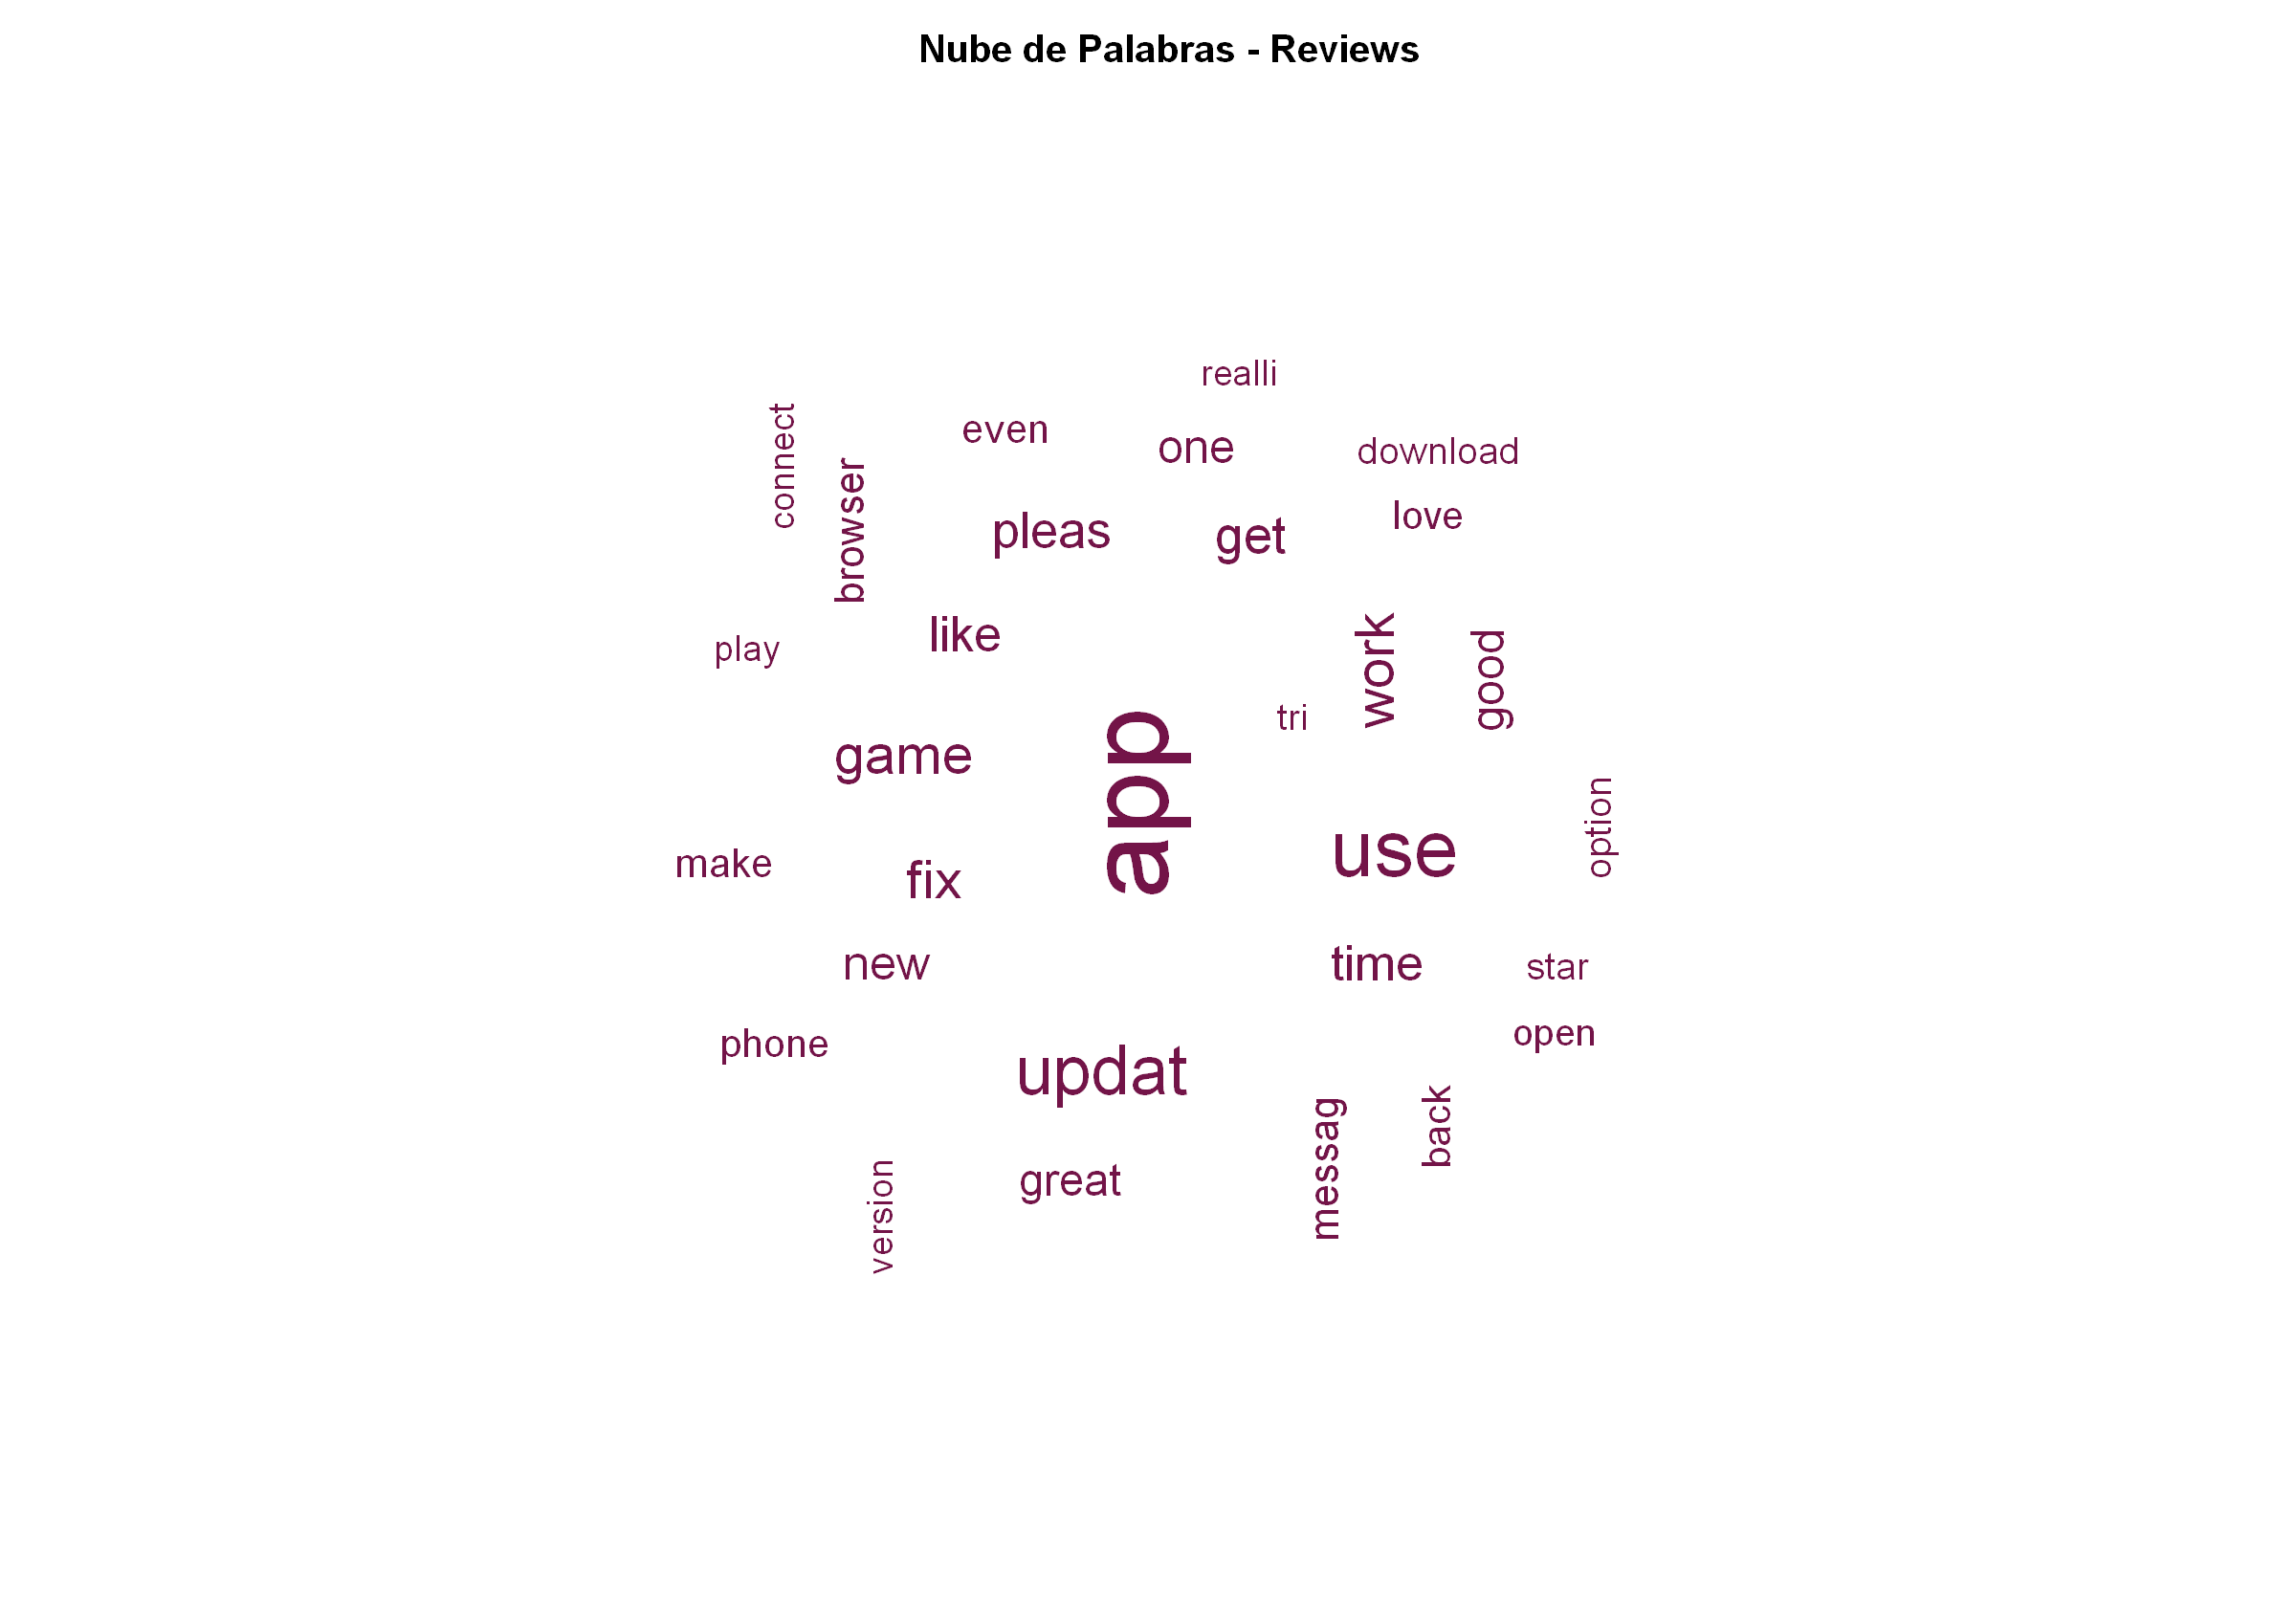

In [23]:
# Define el color personalizado
mi_color <- "#731448"

# Ajusta el tamaño del dispositivo gráfico
options(repr.plot.width=20, repr.plot.height=14)  # Puedes ajustar estos valores según tu preferencia

# Crea la nube de palabras con el color personalizado
wordcloud(words = data_corpus_clean,
          max.words = 30,
          random.order = FALSE,
          colors = mi_color,  # Usa el color personalizado
          scale = c(6, 1),  # Ajusta el rango de tamaño de las palabras
          min.freq = 5,  # Establece la frecuencia mínima para que una palabra aparezca en la nube de palabras
          random.color = TRUE,  # Asigna colores aleatorios a las palabras
          rot.per = 0.3,  # Proporción de palabras giradas
          use.r.layout = FALSE  # Usa el algoritmo de diseño rápido
)

# Ajusta el tamaño de la letra del título
title("Nube de Palabras - Reviews", cex.main = 2)  # Puedes ajustar el valor de cex.main según tu preferencia


Para mejorar la calidad de nuestro analisis, procedemos a limpiar los emojis del texto. Al eliminar estos caracteres especiales, garantizamos que nuestro conjunto de datos este compuesto principalmente por palabras, lo que nos permite realizar un analisis más preciso y detallado. Esta accion nos ayuda a optimizar nuestro proceso de analisis y a obtener resultados mas confiables y significativos. Ademas, volvemos a realizar todos los pasos anteriores pero ahora de manera conjunta:

In [24]:
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}
removeAccents = function(x) chartr('âåäàáèëéìíòóùúÿ', 'aaaaaeeeiioouuy', x)
eliminar_emojis <- function(texto) {
  texto_sin_emojis <- gsub("[^[:alnum:][:space:]]", '', texto)
  return(texto_sin_emojis)
}

clean_corpus = function(corpus){
               data_corpus_clean = tm_map(corpus, content_transformer(tolower))
               data_corpus_clean = tm_map(data_corpus_clean, removeNumbers)   
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords('english'))    
               data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)     
               data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)    
               data_corpus_clean = tm_map(data_corpus_clean, removeAccents)    
               data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)      
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords_english)   
               data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'english')
               data_corpus_clean = tm_map(data_corpus_clean, eliminar_emojis)
               data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)   
  return(data_corpus_clean)
}


In [25]:
data_corpus_clean = clean_corpus(data_corpus) 
print(lapply(data_corpus[[i]][1], as.character))
print(lapply(data_corpus_clean[[i]][1], as.character))

$content
[1] " ugh i don't recommend this because when i tried getting into the game it says that it's downloading but it really isn't and then it doesn't work and i cant play it!. i was so excited to play the game but it just doesn't work for me!!"

$content
[1] "ugh recommend tri get game say download realli work cant play excit play game work"



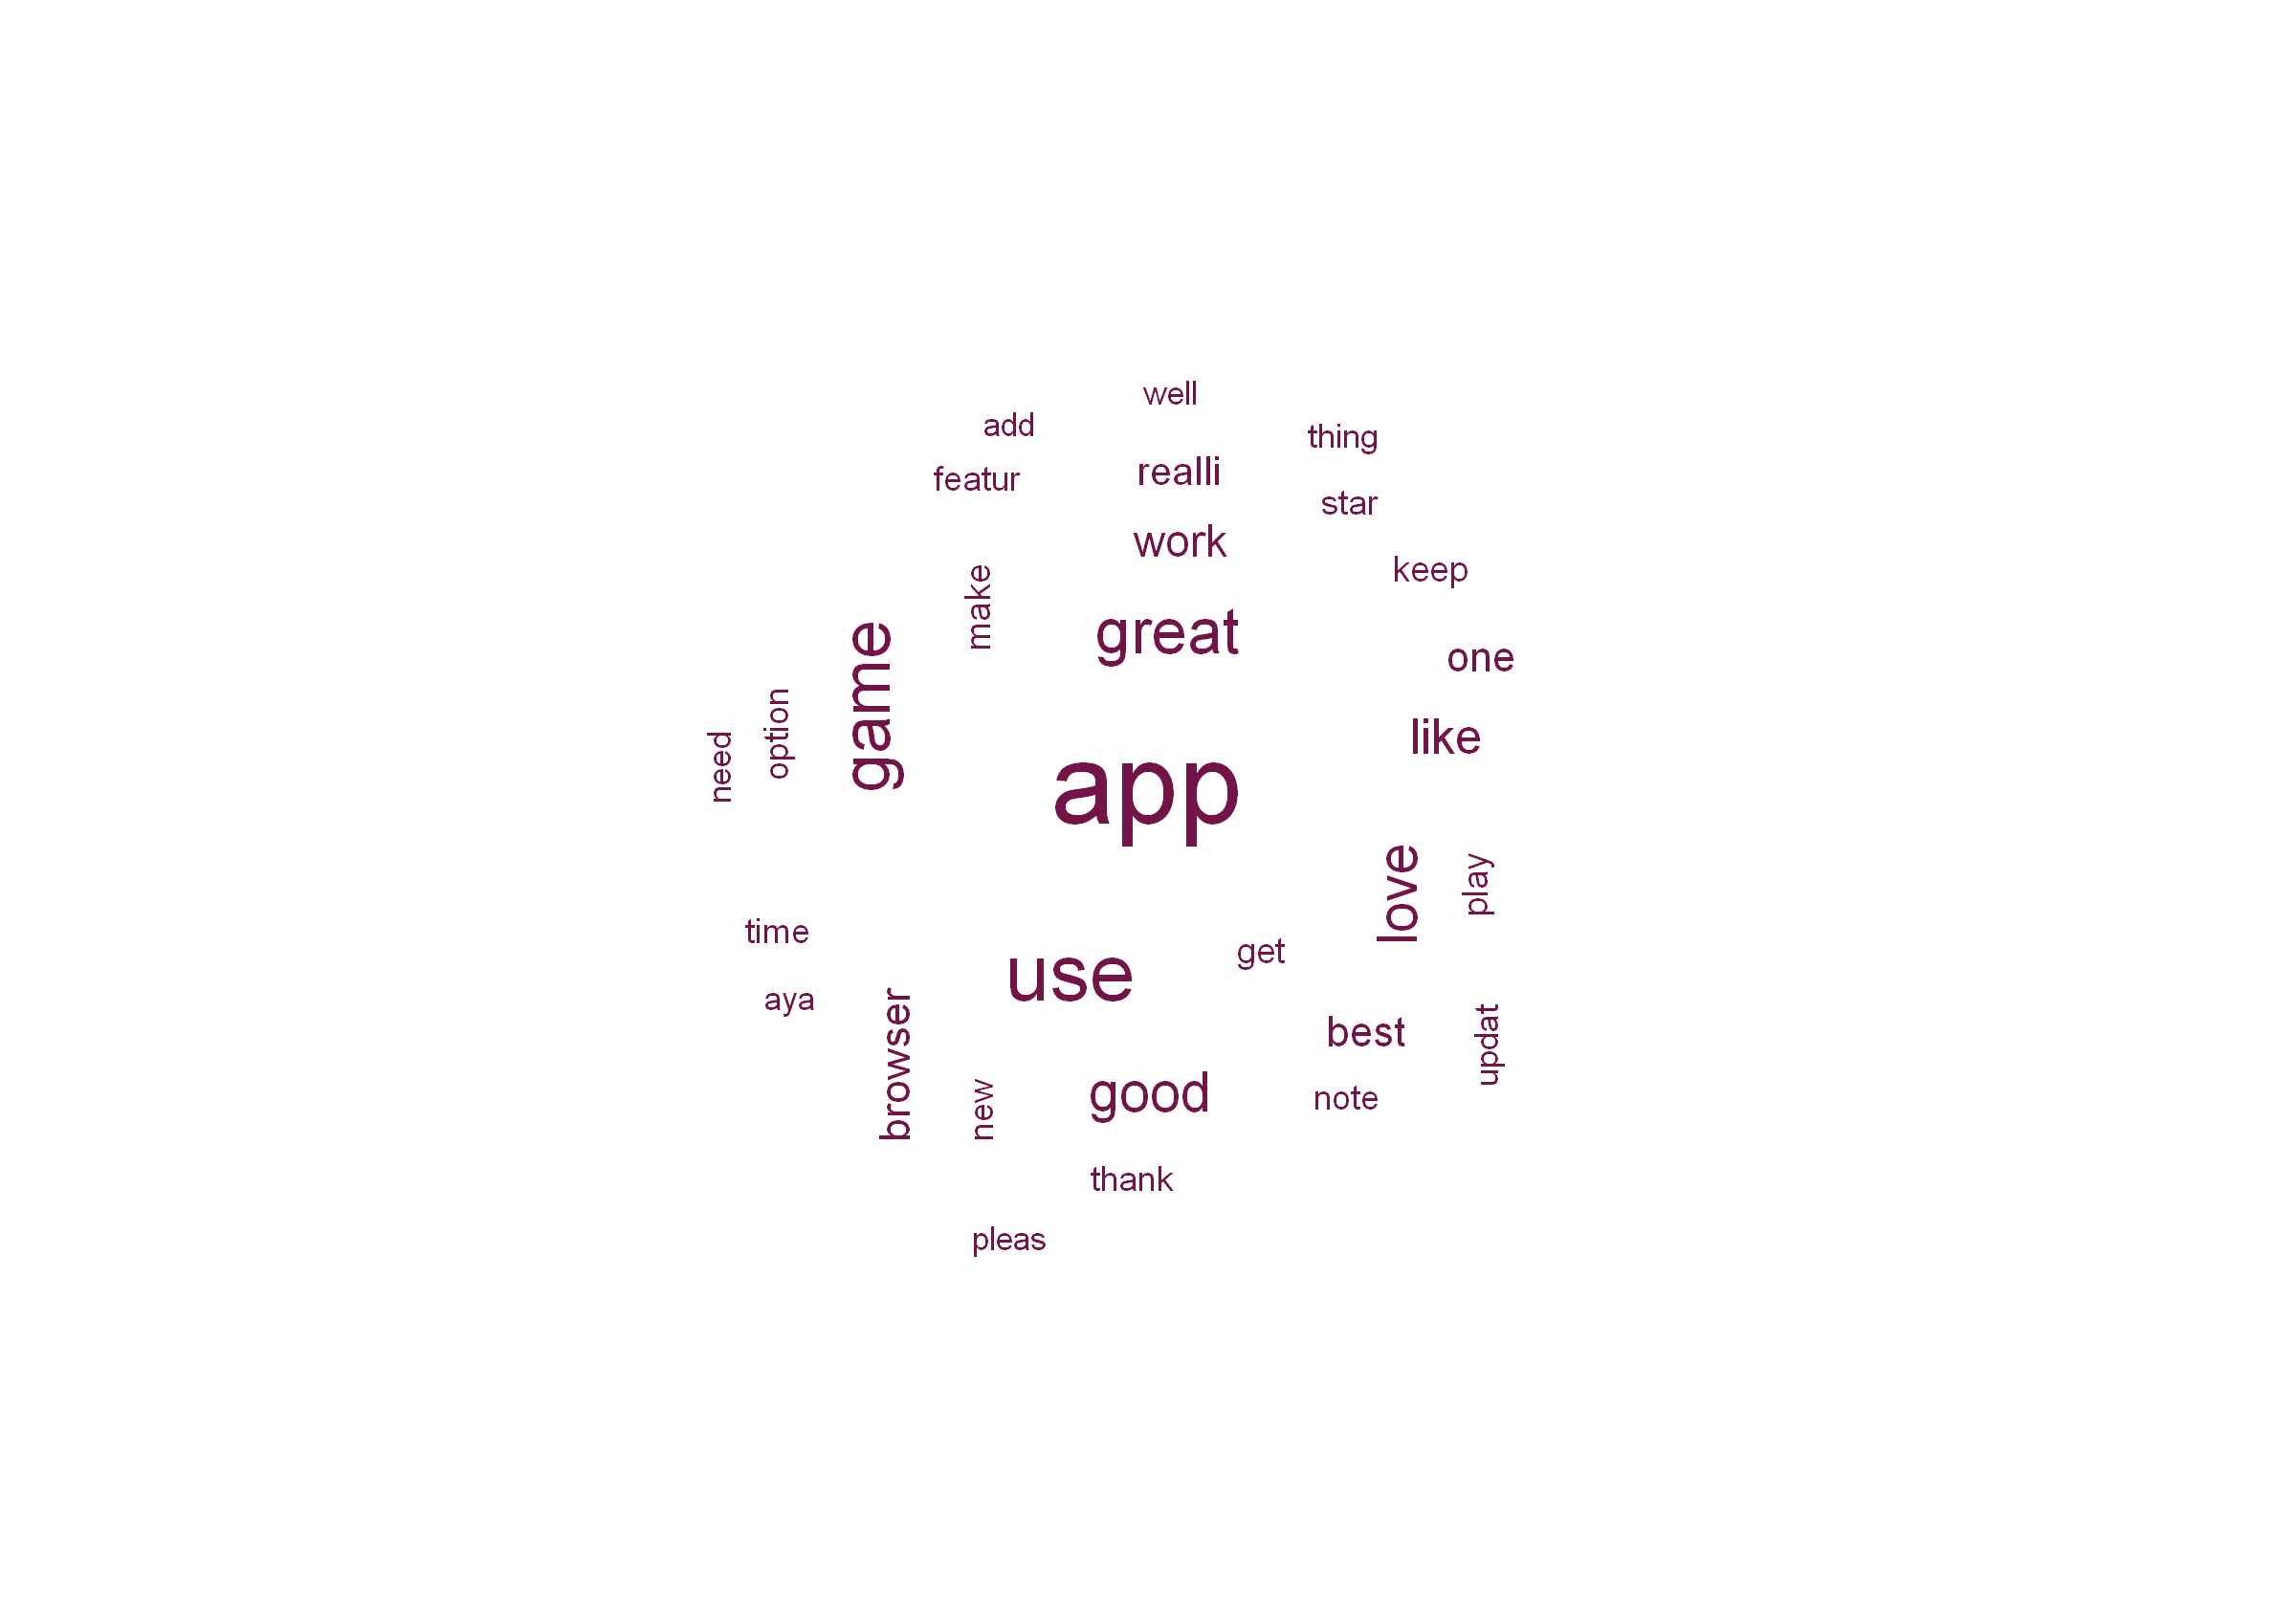

In [26]:
data_subject_noneutral = subset(data, data$polarity =='1')
data_corpus_noneutral = VCorpus(VectorSource(data_subject_noneutral$review),readerControl = list(language = 'en'))
data_corpus_clean_noneutral = clean_corpus(data_corpus_noneutral) 

wordcloud(data_corpus_clean_noneutral,
          max.words = 30,
          random.order = FALSE,
          colors = mi_color,  # Usa el color personalizado
          scale = c(6, 1),  # Ajusta el rango de tamaño de las palabras
          min.freq = 5,  # Establece la frecuencia mínima para que una palabra aparezca en la nube de palabras
          random.color = TRUE,  # Asigna colores aleatorios a las palabras
          rot.per = 0.3,  # Proporción de palabras giradas
          use.r.layout = FALSE  # Usa el algoritmo de diseño rápido
)

## <font color='#731448'>**Entrenamos y validamos nuestro modelo**</font>

In [27]:
dtm = DocumentTermMatrix(data_corpus_clean)
dtm

<<DocumentTermMatrix (documents: 891, terms: 2766)>>
Non-/sparse entries: 16152/2448354
Sparsity           : 99%
Maximal term length: 29
Weighting          : term frequency (tf)

In [28]:
str(dtm)

List of 6
 $ i       : int [1:16152] 1 1 1 1 1 1 1 1 1 2 ...
 $ j       : int [1:16152] 125 187 363 695 801 1542 1724 2517 2659 187 ...
 $ v       : num [1:16152] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 891
 $ ncol    : int 2766
 $ dimnames:List of 2
  ..$ Docs : chr [1:891] "character(0)" "character(0)" "character(0)" "character(0)" ...
  ..$ Terms: chr [1:2766] "aafnaii" "aakhirat" "aalikati" "aap" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [29]:
as.matrix(dtm)

,aafnaii,aakhirat,aalikati,aap,aapsssssss,aaru,abil,abk,abl,absolut,...,yep,yes,yet,youtub,yrs,yup,zenfon,zero,zespol,zoom
character(0),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
character(0),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#Establecemos las frecuencias de cada término sumando las columnas 
termFreq = colSums(as.matrix(dtm))
#print(termFreq) no haremos este printo porque aporta muchas paginas al documento final, sin ser significativo su aporte.

In [31]:
#Creamos el nuevo data set
tabla_frec = data.frame(term = names(termFreq), freq = termFreq)
tail(tabla_frec)

,term,freq
,<chr>,<dbl>
yrs,yrs,2
yup,yup,1
zenfon,zenfon,2
zero,zero,1
zespol,zespol,1
zoom,zoom,4


In [32]:
#Ordenamos por frecuencias descendientes
tabla_frec = tabla_frec[order(-tabla_frec[,2]),]
head(tabla_frec)

,term,freq
,<chr>,<dbl>
app,app,480
use,use,299
updat,updat,243
game,game,179
work,work,176
fix,fix,171


In [33]:
set.seed(33)

# Creamos el data partition de la función caret con un 70 - 30 split
inTrain <- createDataPartition(y = data$polarity
                                  , p = .70
                                  , list = FALSE
                                  , times = 1)
# Definitmos los datasets originales entre train y test
data.train<-data[inTrain,]
data.test<-data[-inTrain,]
# Revisamos el split
str(data.train)
str(data.test)

'data.frame':	624 obs. of  3 variables:
 $ review    : chr  "  you dont have to go to your wall calender and turn the page for your month event...this apps is just awesome." " awesome it's a great game that will test your patience. you may have to spend real money if you can't wait to "| __truncated__ "  is a shame that when you share picture with your contact all people that has google account sees all the pict"| __truncated__ " samsung note 4 - awesome business platform! please consider adding an edit option in addition to delete for ou"| __truncated__ ...
 $ polarity  : Factor w/ 2 levels "0","1": 2 2 1 1 1 1 1 1 1 1 ...
 $ aplicacion: chr  "com.hamropatro" "com.king.candycrushsaga" "com.google.android.talk" "com.linkedin.android" ...
'data.frame':	267 obs. of  3 variables:
 $ review    : chr  " â­\220â­\220â­\220 when will this app be created to automatically start at the top with new posts instead of h"| __truncated__ " great way to stay organized i jot notes for work, family, sho

In [34]:
# Separamos el corpus según la clase
corpus.train = data_corpus_clean[inTrain]
corpus.test  = data_corpus_clean[-inTrain]

# Y finalmente el Document term matrix
dtm.train = dtm[inTrain, ]
dtm.test  = dtm[-inTrain, ]

# Comprobamos que el desbalanceo de clases es el adecuado
print("Training")
round(prop.table(table(data.train$polarity))*100, 2)
print("Test")
round(prop.table(table(data.test$polarity))*100, 2)

[1] "Training"



    0     1 
65.54 34.46 

[1] "Test"



    0     1 
65.54 34.46 

In [35]:
#Encontramos todas las palabras que se repiten más de 3 veces
freq_terms = findFreqTerms(dtm.train, 3)
freq_terms

[1] "abil"       "abl"        "absolut"    "access"     "account"   
  [6] "achiev"     "action"     "activ"      "actual"     "add"       
 [11] "addict"     "address"    "adjust"     "advertis"   "age"       
 [16] "ago"        "aint"       "allow"      "almost"     "along"     
 [21] "alreadi"    "also"       "alway"      "amaz"       "among"     
 [26] "amount"     "android"    "angri"      "anim"       "annoy"     
 [31] "anoth"      "answer"     "anymor"     "anyon"      "anyth"     
 [36] "aºa"        "app"        "appeal"     "appear"     "appli"     
 [41] "applic"     "appreci"    "around"     "artifact"   "asap"      
 [46] "ask"        "aspect"     "asus"       "atleast"    "attack"    
 [51] "audio"      "auto"       "automat"    "avail"      "averag"    
 [56] "away"       "awesom"     "awsom"      "aya"        "ayaay"     
 [61] "back"       "background" "backup"     "bad"        "bar"       
 [66] "base"       "basic"      "batteri"    "beauti"     "becom"     
 [71] "begin"      "behind"     "best"       "beta"       "better"    
 [76] "big"        "bird"       "bit"        "black"      "blank"     
 [81] "block"      "book"       "bookmark"   "boost"      "booster"   
 [86] "bore"       "bottom"     "box"        "break"      "brilliant" 
 [91] "bring"      "brows"      "browser"    "bug"        "buggi"     
 [96] "build"      "busi"       "button"     "buy"        "cach"      
[101] "calendar"   "call"       "camera"     "candi"      "cant"      
[106] "cap"        "capit"      "captur"     "card"       "care"      
[111] "carousel"   "caus"       "certain"    "challeng"   "chang"     
[116] "charact"    "chat"       "check"      "choic"      "choos"     
[121] "christma"   "chrome"     "clan"       "classic"    "cleaner"   
[126] "clear"      "click"      "close"      "cloud"      "clutter"   
[131] "code"       "color"      "come"       "comment"    "communic"  
[136] "compani"    "compar"     "compat"     "complain"   "complaint" 
[141] "complet"    "comput"     "con"        "concern"    "confus"    
[146] "connect"    "constant"   "contact"    "content"    "continu"   
[151] "control"    "convers"    "cool"       "copi"       "countri"   
[156] "coupl"      "coz"        "crap"       "crash"      "crazi"     
[161] "creat"      "crush"      "current"    "custom"     "cut"       
[166] "daili"      "dark"       "data"       "day"        "dead"      
[171] "dear"       "default"    "definit"    "delet"      "deliv"     
[176] "design"     "desir"      "desktop"    "destroy"    "detail"    
[181] "dev"        "develop"    "devic"      "differ"     "difficult" 
[186] "direct"     "dis"        "disabl"     "disappear"  "disappoint"
[191] "display"    "document"   "doesnt"     "done"       "dont"      
[196] "doubt"      "download"   "drain"      "drive"      "drop"      
[201] "dropbox"    "due"        "dumb"       "dwnldng"    "eas"       
[206] "easi"       "easili"     "edg"        "edit"       "either"    
[211] "els"        "email"      "emoji"      "emot"       "enabl"     
[216] "end"        "engin"      "english"    "enjoy"      "enough"    
[221] "enter"      "entertain"  "entir"      "epap"       "episod"    
[226] "error"      "especi"     "essenti"    "etc"        "even"      
[231] "event"      "ever"       "everi"      "evernot"    "everyday"  
[236] "everyon"    "everyth"    "everytim"   "everywher"  "exact"     
[241] "excel"      "except"     "exist"      "exit"       "expect"    
[246] "expens"     "experi"     "express"    "extrem"     "face"      
[251] "facebook"   "facil"      "fact"       "fail"       "famili"    
[256] "fan"        "fantast"    "far"        "farm"       "fast"      
[261] "faster"     "fastest"    "fav"        "favorit"    "featur"    
[266] "feed"       "feel"       "figur"      "file"       "final"     
[271] "find"       "fine"       "firefox"    "first"      "five"      
[276] "fix"        "folder"     "follow"     "font"       "forc"      
[281] "format"     "forum"

In [36]:
#Recortamos el data set con las palabras con una frecuencia superior a 3
freq_terms = findFreqTerms(dtm.train, 3)
reduced_dtm.train = DocumentTermMatrix(corpus.train, list(dictionary=freq_terms))
reduced_dtm.test =  DocumentTermMatrix(corpus.test, list(dictionary=freq_terms))

#Revisamos cuantas columnas reducimos
ncol(dtm.train)
ncol(reduced_dtm.train)
ncol(dtm.test)
ncol(reduced_dtm.test)

[1] 2766

[1] 835

[1] 2766

[1] 835

## <font color='#731448'>**Clasificador Naive Bayes**</font>

Naive Bayes es un algoritmo de aprendizaje supervisado usado para clasificacion y modelado predictivo. Funciona calculando la probabilidad condicional de que una instancia pertenezca a una clase especifica dado un conjunto de caracteristicas observadas previamente. Este modelo hace una suposicion simplificada de independencia condicional entre las caracteristicas, lo que significa que asume independencia entre si dado el valor de la clase.

In [37]:
convert_counts = function(x) {
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0, 1), labels=c("Nulo", "No Nulo"))
  return (x)
}

# apply() allows us to work either with rows or columns of a matrix.
# MARGIN = 1 is for rows, and 2 for columns
reduced_dtm.train = apply(reduced_dtm.train, MARGIN=2, convert_counts)
reduced_dtm.test  = apply(reduced_dtm.test, MARGIN=2, convert_counts)

In [38]:
# Almacena nuestro modelo en subject_classifier
subject_classifier <- naiveBayes(x = reduced_dtm.train,  # Dataset de entrenamiento
                                  y = data.train$polarity)  # Target de entrenamiento

# Realiza predicciones utilizando el modelo creado con los datos de entrenamiento
subject_test.predicted <- predict(subject_classifier,  # Modelo
                                  newdata = reduced_dtm.test)  # Dataset de test


In [39]:
# Ahora sacamos el confusion matrix
confusionMatrix(subject_test.predicted, data.test$polarity)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 148  21
         1  27  71
                                          
               Accuracy : 0.8202          
                 95% CI : (0.7688, 0.8644)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 1.822e-09       
                                          
                  Kappa : 0.608           
                                          
 Mcnemar's Test P-Value : 0.4705          
                                          
            Sensitivity : 0.8457          
            Specificity : 0.7717          
         Pos Pred Value : 0.8757          
         Neg Pred Value : 0.7245          
             Prevalence : 0.6554          
         Detection Rate : 0.5543          
   Detection Prevalence : 0.6330          
      Balanced Accuracy : 0.8087          
                                          
       'Positive' Class : 0               
                              

Con una simple limpieza estructural de las reviews hemos conseguido un accuracy de aproximadamente un 82%. Veamos que sucede con nuestros errores de tipo I y errores de tipo II para comprender nuestros errores de prediccion:

In [40]:
# Visualizamos las instancias que han sido filtradas erróneamente
data.test[(subject_test.predicted != data.test$polarity) # Seleccionamos las instancias con error en la predicción
          & (data.test$polarity == '1'),] # Seleccionamos las instancias con etiqueta ham

,review,polarity,aplicacion
,<chr>,<fct>,<chr>
603,"the most useful app in the marketplace if used properly . . . if you've ever thought how nice it would be to get rid of all the paper and clutter in your life and yet still have it available anytime/all the time using powerful searches, then evernote is for you. take a picture of anything and store it; scan paper using your smart phone or scanner and store it all in a note; forward emails directly into evernote; drag and drop computer files, create a note using your finger in handwriting or text mode, clip pages or parts of web pages, use voice . . .",1,com.evernote
888,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1,com.rovio.angrybirds
343,i love viber viber is an excellent chatting software. only one tiny negative comment for you. sometimes it takes a delay to reach message even online. stickers are so cool...,1,com.viber.voip
795,"i've used firefox on all my mobile devices and computers for years, but since this latest update it's become unusable on my galaxy note 10.1. links either don't work or take you to a different link on the page and the tops & bottoms of pages are obscured so only around a third of the page is visible and search boxes can't be accessed. i hate the idea of changing to chrome etc, but my tablet has been rendered useless for browsing. please sort it out mozilla.",1,org.mozilla.firefox
441,occasionally i won't receive a notification of a message(s) so i don't know that someone has replied until i actually open the app and then suddenly lots of messages come through... 5 stars if that can be fixed,1,com.whatsapp
839,support service poor support service.,1,com.hamropatro
483,works fine for the most part. not sure why it decides to sometimes notify me and sometimes not. i guess it has something to do with inactivity on other logged in devices (i'm usually logged in 24/7 on 2 computers and a phone).,1,com.Slack
224,"know how to get the account back. you have to delete clash of clans,then you download it again, then you look on the upper left corner of the screen, then you see already have a village?'' then you press it,then you will have your village.",1,com.supercell.clashofclans
126,memory game the levels are so hard and less moves . l do no how to pass 95 levels but levels are so bour. chico bar is very hard to finish. please any of you send me life,1,com.king.candycrushsaga


In [41]:
# Visualizamos las instancias que han sido filtradas erróneamente, los comentarios se haran al finalizar el ejercicio
data.test[(subject_test.predicted != data.test$polarity)
          & (data.test$polarity == '0'),]

,review,polarity,aplicacion
,<chr>,<fct>,<chr>
531,"bait and switch i purchased my 3rd samsung tablet with advertisement of free gifts, one of them being 48 additional gb cloud storage for 2 years. the 2nd samsung tablet i bought also had this free gift and it was a nightmare to get samsung and dropbox to honor it. so, after buying this 3rd high end tablet with the same claim of the free 48gb for 2 years in the fine print, which you can only see after purchasing the tablet, dropbox only honors the offer on the first device you purchased and you are disqualified for all future devices. this is sleazy and bait and switch. free= not subject to any compensation, encumbrance, repayment in kind, etc. because of this bait and switch advertising on the part of samsung and dropbox i suggest you really find out what kind of company dropbox is before using their services.",0,com.dropbox.android
643,"neat nice ,smooth ,speed but downloading is lacking in speed correct this i'll give u 5 star",0,com.uc.browser.en
760,ads? really? ads in the kantipur app? you guys so down to earn money?,0,com.shirantech.kantipur
506,"need swipe between images nice app, but it would be really nice if you could swipe between images when viewing them full size.",0,com.Slack
373,"often painfully slow. needs a useful tablet ui, quick reply, and the ability to send video. some of these are features the ios version has had for almost 2 years and that isn't really excusable from the company that runs android. this is the kind of thing that makes people switch to ios or makes android phone lovers buy ipads instead of android tablets.",0,com.google.android.talk
498,rewelacja bardzo uÄºÅºyteczne narzÃ¤Â™dzie do komunikacji w zespole!,0,com.Slack
193,"always fun, but... i like this new frozen shadows, but the depth perception is not so good. it's hard to see an approaching corner. other then that small bug, i love this game and will continue to play it.",0,com.imangi.templerun2
132,lost power ups switched phones and lost my power ups. i had accumulated quite a lot. how do i get them back.,0,com.king.candycrushsaga
199,temple run 2 frozen shadows i love this game so much i love being in the ice but only one thing that i hate about it is that the monster goes infront of u when your running but as you go further into the game it gets harder but able to pass the monster,0,com.imangi.templerun2


In [48]:
data_subject_eC = read.csv(file='sentiment_dataset.csv', header=TRUE)
head(data_subject_eC)
tail(data_subject_eC)

,ï..package_name,review,polarity
,<chr>,<chr>,<int>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed Ä‘ÂŸÂ˜Â”",0


,ï..package_name,review,polarity
,<chr>,<chr>,<int>
886,com.rovio.angrybirds,too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance.,1
887,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1
888,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1
889,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0
890,com.rovio.angrybirds,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1
891,com.rovio.angrybirds,they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 Ä‘ÂŸÂŒÂŸ because nothing's perfect,1


In [49]:
data_corpus_eC = VCorpus(VectorSource(data_subject_eC$review),readerControl = list(language = 'en'))
print(data_corpus_eC)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 891


In [52]:
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}
removeAccents = function(x) chartr('âåäàáèëéìíòóùúÿ', 'aaaaaeeeiioouuy', x)
eliminar_emojis <- function(texto) {
  texto_sin_emojis <- gsub("[^[:alnum:][:space:]]", '', texto)
  return(texto_sin_emojis)
}

clean_corpus= function(corpus){
               data_corpus_clean = tm_map(corpus, content_transformer(tolower))
               data_corpus_clean = tm_map(data_corpus_clean, removeNumbers)   
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords('english'))    
               data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)     
               data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)    
               data_corpus_clean = tm_map(data_corpus_clean, removeAccents)    
               data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)      
               data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords_english)   
               data_corpus_clean = tm_map(data_corpus_clean, stemDocument, 'english')
               data_corpus_clean = tm_map(data_corpus_clean, eliminar_emojis)
               data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)   
  return(data_corpus_clean)
}

data_corpus_clean_eC = clean_corpus(data_corpus_eC) 

In [53]:
dtm_eC = DocumentTermMatrix(data_corpus_clean_eC)
dtm_eC

<<DocumentTermMatrix (documents: 891, terms: 2766)>>
Non-/sparse entries: 16152/2448354
Sparsity           : 99%
Maximal term length: 29
Weighting          : term frequency (tf)

In [54]:
reduced_dtm_eC_predict = apply(dtm_eC, MARGIN=2, convert_counts)

In [55]:
subject_test.predicted = predict(subject_classifier,  # Predicciones utilizando el modelo creado con los datos de entrenamiento
                             reduced_dtm_eC_predict)

In [56]:
round(prop.table(table(subject_test.predicted))*100, digits = 1)

subject_test.predicted
   0    1 
61.7 38.3 

In [64]:
data_subject_eCpredict=cbind(data_subject_eC,subject_test.predicted)
data_subject_eCpredict_s <- subset(data_subject_eCpredict, subject_test.predicted =='polarity') 

### <font color='#731448'>**Laplace Smoothing**</font>

El suavizado de Laplace es una tecnica que se puede utilizar en la clasificación de texto con el algoritmo de Naive Bayes. Esta herramienta ayuda a resolver el problema de la probabilidad cero, que puede surgir cuando una palabra presente en el conjunto de prueba no esta en el conjunto de entrenamiento. Este problema toma una mayor relevancia cuando tratamos con un texto de amplio vocabulario.

In [63]:
# Hacemos una iteración para nuestro modelo en base a un factor i, siendo i el factor alpha en el laplace smoothing
for (i in (1:10))
{
    print(paste0("Laplace factor of ", as.character((i-1)/4)))
    sms_classifier2 = naiveBayes(x = reduced_dtm.train, 
                                  y = data.train$polarity,
                                 laplace = (i-1)/2)
    sms_test.predicted2 = predict(sms_classifier2,
                                  reduced_dtm.test)

    print(confusionMatrix(sms_test.predicted2, data.test$polarity))
}

[1] "Laplace factor of 0"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 148  21
         1  27  71
                                          
               Accuracy : 0.8202          
                 95% CI : (0.7688, 0.8644)
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 1.822e-09       
                                          
                  Kappa : 0.608           
                                          
 Mcnemar's Test P-Value : 0.4705          
                                          
            Sensitivity : 0.8457          
            Specificity : 0.7717          
         Pos Pred Value : 0.8757          
         Neg Pred Value : 0.7245          
             Prevalence : 0.6554          
         Detection Rate : 0.5543          
   Detection Prevalence : 0.6330          
      Balanced Accuracy : 0.8087          
                                          
       'Positive' Class : 0               
    

El modelo muestra una precision aceptable del 82%. No obstante, al evaluar las predicciones con el archivo original, se evidencian algunas consideraciones. En primer lugar, se encuentran reviews en diferentes idiomas, incluyendo espaniol, mientras que el modelo se entreno exclusivamente en ingles. Es claro que el modelo no podra predecir con precision en estos casos, dado que todas las transformaciones se basaron en la estructura del ingles. En segundo lugar, se observa que la base de datos original contiene errores de etiquetado. Por ejemplo, hay casos en los que comentarios con carga emotiva positiva estan clasificados erroneamente como polaridad = 0, como en el caso de "neat nice, smooth, speed but downloading is lacking in speed correct this I'll give u 5 star". Este comentario incluye adjetivos positivos junto con una critica sobre la velocidad de descarga, lo cual deberia haber sido etiquetado como polaridad = 1. En tercer lugar, al remover emojis de los comentarios, se logró una limpieza adicional del texto y una mejora en la precision del modelo, pasando de aproximadamente un 74% a un 82% final. Por ultimo, se aplico Laplace para ajustar el modelo frente a casos de probabilidad cero entre los datos de entrenamiento y prueba. Sin embargo, no se observo una variacion significativa en la precision. Esto podria deberse a que el vocabulario del texto es limitado, lo que resulta en pocas palabras presentes en el conjunto de prueba pero ausentes en el conjunto de entrenamiento.